## SVM ( support vector machine )

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

In [2]:
df=pd.read_excel("D:/Programming/DATA - SCIENCE/oil_data/Chapter 5/Support Vector Machine (SVM)/Chapter5_Geomechanical_Properties_Prediction_DataSet.xlsx")

In [4]:
df.head(3)

,Depth,Resistivity,Gamma Ray,Total Porosity,Effective Porosity,Bulk Density,Compression Wave Travel Time,Shear Wave Travel Time
0,6805.0,57.47087,110.47838,0.03449,0.00445,2.76576,67.67523,124.05187
1,6805.5,58.85637,112.94601,0.03716,0.00775,2.76560,67.74464,123.80700
2,6806.0,65.01717,114.49005,0.03828,0.00976,2.75550,67.75224,123.40514


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Depth,1904.0,7280.750000,274.890887,6805.00000,7042.875000,7280.750000,7518.625000,7756.50000
Resistivity,1904.0,146.141582,322.464089,17.41317,62.688825,85.495010,121.405745,7223.24072
Gamma Ray,1904.0,116.270437,61.220418,24.46347,84.264097,117.570395,130.947012,623.15021
Total Porosity,1904.0,0.059863,0.023739,0.00287,0.042928,0.055185,0.074783,0.14208
Effective Porosity,1904.0,0.038633,0.023542,0.00212,0.019688,0.037425,0.054220,0.11932
Bulk Density,1904.0,2.652268,0.072419,2.42895,2.601138,2.658085,2.707355,2.84976
Compression Wave Travel Time,1904.0,73.176217,10.732976,50.80565,64.791450,72.718335,80.846762,101.45572
Shear Wave Travel Time,1904.0,123.929532,19.252592,85.47424,114.705535,127.687235,137.370110,184.77879


In [8]:
df.isna().sum()

Depth                           0
Resistivity                     0
Gamma Ray                       0
Total Porosity                  0
Effective Porosity              0
Bulk Density                    0
Compression Wave Travel Time    0
Shear Wave Travel Time          0
dtype: int64

In [13]:
len(df.columns)

8

## [ 1 ] plot the distribution

c:\users\ae504\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\ae504\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\ae504\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either 

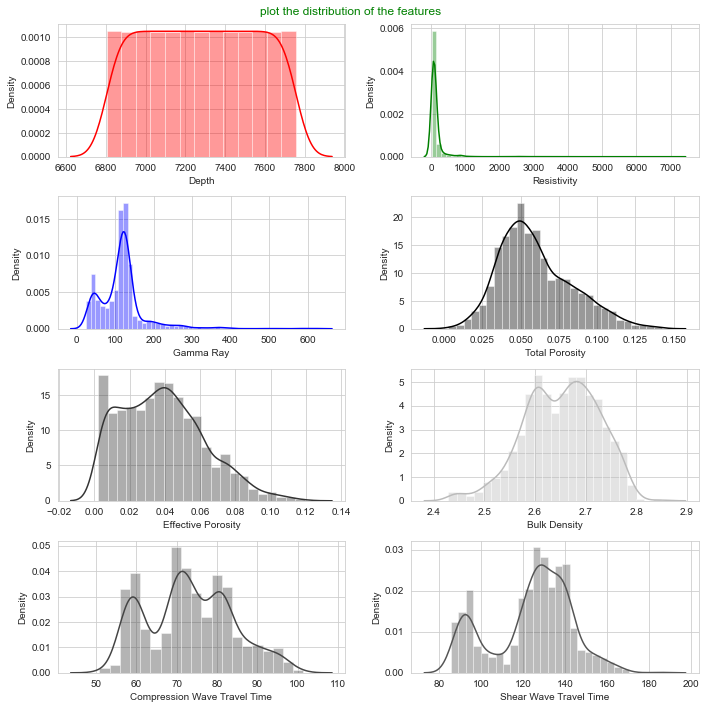

In [25]:
f,axes=plt.subplots(nrows=4,ncols=2,figsize=(10,10))
f.suptitle("plot the distribution of the features",color="green")
sns.distplot(df[df.columns[0]],color='red',ax=axes[0,0])
sns.distplot(df[df.columns[1]],color="green",ax=axes[0,1])
sns.distplot(df[df.columns[2]],color="blue",ax=axes[1,0])
sns.distplot(df[df.columns[3]],color="black",ax=axes[1,1])
sns.distplot(df[df.columns[4]],color="#333",ax=axes[2,0])
sns.distplot(df[df.columns[5]],color="#bbb",ax=axes[2,1])
sns.distplot(df[df.columns[6]],color="#444",ax=axes[3,0])
sns.distplot(df[df.columns[7]],color="#555",ax=axes[3,1])
plt.tight_layout()

- gamaray and resistivety have outlayiers

c:\users\ae504\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\ae504\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\ae504\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will re

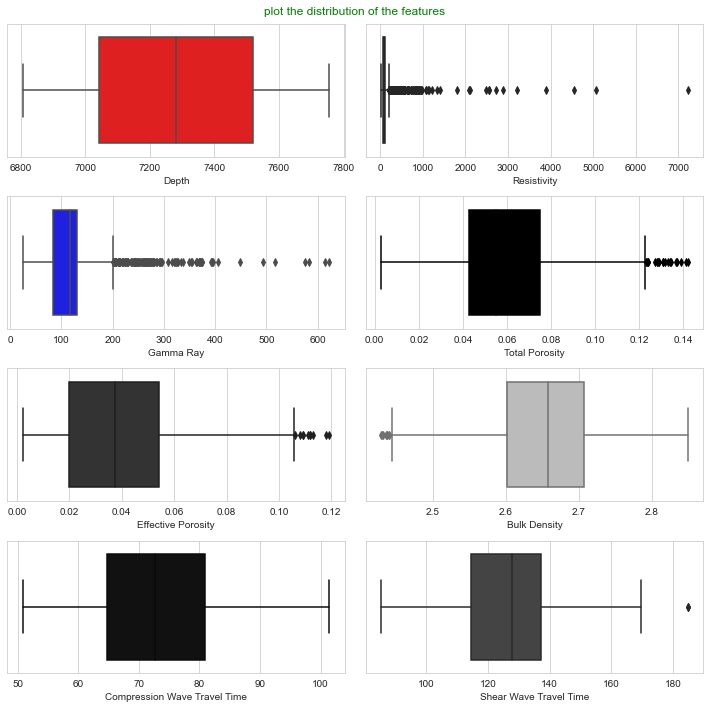

In [29]:
f,axes=plt.subplots(nrows=4,ncols=2,figsize=(10,10))
f.suptitle("plot the distribution of the features",color="green")
sns.boxplot(df[df.columns[0]],color='red',ax=axes[0,0])
sns.boxplot(df[df.columns[1]],color="green",ax=axes[0,1])
sns.boxplot(df[df.columns[2]],color="blue",ax=axes[1,0])
sns.boxplot(df[df.columns[3]],color="black",ax=axes[1,1])
sns.boxplot(df[df.columns[4]],color="#333",ax=axes[2,0])
sns.boxplot(df[df.columns[5]],color="#bbb",ax=axes[2,1])
sns.boxplot(df[df.columns[6]],color="#111",ax=axes[3,0])
sns.boxplot(df[df.columns[7]],color="#444",ax=axes[3,1])
plt.tight_layout()

## [ 2 ] remove the outliers

In [30]:
df.columns

Index(['Depth', 'Resistivity', 'Gamma Ray', 'Total Porosity',
       'Effective Porosity', 'Bulk Density', 'Compression Wave Travel Time',
       'Shear Wave Travel Time'],
      dtype='object')

In [32]:
df=df[(df["Resistivity"]>0) & (df["Resistivity"]<1000)]
df=df[(df["Gamma Ray"]>0) & (df["Gamma Ray"]<400)]

In [33]:
df

,Depth,Resistivity,Gamma Ray,Total Porosity,Effective Porosity,Bulk Density,Compression Wave Travel Time,Shear Wave Travel Time
0,6805.0,57.47087,110.47838,0.03449,0.00445,2.76576,67.67523,124.05187
1,6805.5,58.85637,112.94601,0.03716,0.00775,2.76560,67.74464,123.80700
2,6806.0,65.01717,114.49005,0.03828,0.00976,2.75550,67.75224,123.40514
3,6806.5,63.35363,116.06593,0.03364,0.00568,2.74892,67.71935,123.23686
4,6807.0,62.28267,117.68179,0.03199,0.00340,2.75687,67.69218,123.43977
...,...,...,...,...,...,...,...,...
1893,7751.5,41.67107,60.00087,0.02962,0.02054,2.65615,58.97205,97.00078
1894,7752.0,110.31667,71.66255,0.02337,0.01526,2.66375,57.26490,95.73855
1895,7752.5,626.33398,82.68261,0.01833,0.01272,2.66690,55.11663,94.34170
1898,7754.0,576.06525,68.81011,0.01027,0.00922,2.68806,52.25089,91.60201


## [3] draw the correlation

<AxesSubplot:>

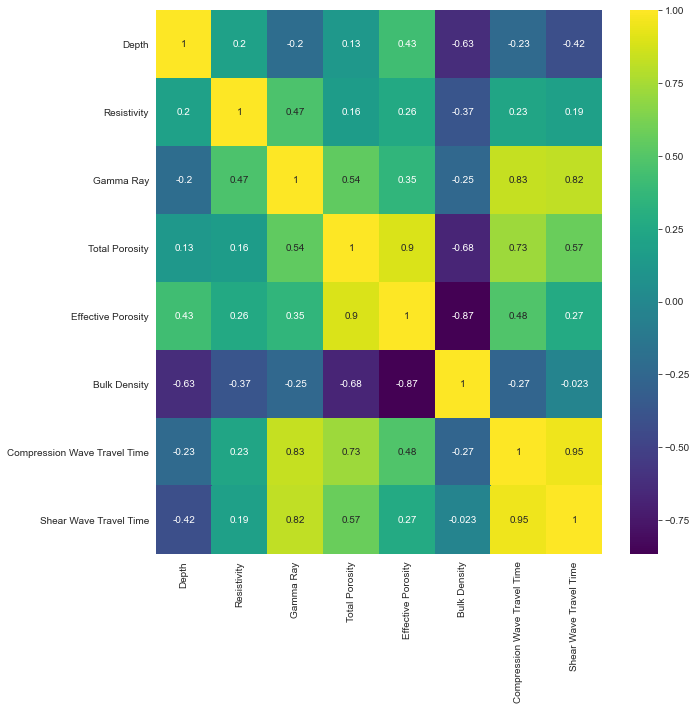

In [34]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap="viridis")

## [4] feature selection
- [total porosity] has good collinear relation with [effective porosity]
- [total porosity] has stronger relation with the [output]
- so, we only remove the effective porosity from the inputs

In [37]:
from sklearn.preprocessing import MinMaxScaler
normalizer=MinMaxScaler(feature_range=(0,1))
df_scaled=normalizer.fit_transform(df)
df_scaled=pd.DataFrame(df_scaled,columns=df.columns)

In [38]:
df_scaled

,Depth,Resistivity,Gamma Ray,Total Porosity,Effective Porosity,Bulk Density,Compression Wave Travel Time,Shear Wave Travel Time
0,0.000000,0.041347,0.231242,0.202978,0.012466,0.800385,0.314510,0.388478
1,0.000527,0.042777,0.237876,0.222757,0.040836,0.800005,0.315918,0.386012
2,0.001053,0.049136,0.242027,0.231054,0.058116,0.776003,0.316072,0.381965
3,0.001580,0.047419,0.246264,0.196681,0.023040,0.760367,0.315405,0.380271
4,0.002106,0.046314,0.250608,0.184458,0.003439,0.779259,0.314853,0.382314
...,...,...,...,...,...,...,...,...
1871,0.996840,0.025039,0.095539,0.166901,0.150791,0.539911,0.137900,0.116073
1872,0.997367,0.095893,0.126890,0.120602,0.105399,0.557972,0.103258,0.103362
1873,0.997894,0.628517,0.156516,0.083265,0.083563,0.565457,0.059664,0.089296
1874,0.999473,0.576631,0.119221,0.023557,0.053473,0.615741,0.001511,0.061707


In [63]:
X=df_scaled.drop(["Compression Wave Travel Time","Shear Wave Travel Time"],axis=1)
Y=df_scaled[["Compression Wave Travel Time","Shear Wave Travel Time"]]

In [64]:
from sklearn.model_selection import train_test_split
np.random.seed(1000)
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=.3)

## fitting the model

In [65]:
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor

In [66]:
svm=MultiOutputRegressor((SVR(kernel='rbf', gamma=1,C=1)))

In [67]:
svm.fit(x_train,y_train)

MultiOutputRegressor(estimator=SVR(C=1, gamma=1))

In [80]:
y_train_pred=svm.predict(x_train)
y_test_pred=svm.predict(x_test)

##  evaluation

In [69]:
from sklearn.metrics import r2_score

In [70]:
r2_score( y_test["Compression Wave Travel Time"] ,y_test_pred[:,0])

0.9252758936485604

In [71]:
(np.corrcoef(y_test["Compression Wave Travel Time"] ,y_test_pred[:,0])[0,1])**2

0.9266460384840548

In [75]:
print(f"R^2 score for compression travel time( test_data):{ r2_score( y_test['Compression Wave Travel Time'] ,y_test_pred[:,0])}")

R^2 score for compression travel time( test_data):0.9252758936485604


In [76]:
print(f"R^2 score for shear travel time( test_data):{ r2_score( y_test['Shear Wave Travel Time'] ,y_test_pred[:,1])}")

R^2 score for shear travel time( test_data):0.9152260113866039


In [78]:
print(f"R^2 score for shear travel time( train_data):{ r2_score( y_train['Shear Wave Travel Time'] ,y_train_pred[:,1])}")

R^2 score for shear travel time( train_data):0.9037126410212117


In [79]:
print(f"R^2 score for Compression travel time( test_data):{ r2_score( y_test['Compression Wave Travel Time'] ,y_test_pred[:,0])}")

R^2 score for Compression travel time( test_data):0.9252758936485604


In [81]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [84]:
print("for the compression wave travel [testing data]")
print(f"MAE: {mean_absolute_error(y_test['Compression Wave Travel Time'] ,y_test_pred[:,0])}")
print(f"MSE: {mean_squared_error(y_test['Compression Wave Travel Time'] ,y_test_pred[:,0])}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test['Compression Wave Travel Time'] ,y_test_pred[:,0]))}")
    

for the compression wave travel [testing data]
MAE: 0.04529221859151161
MSE: 0.0035673773830994225
RMSE: 0.059727526175955274


In [85]:
print("for the shear wave travel [testing data]")
print(f"MAE: {mean_absolute_error(y_test['Shear Wave Travel Time'] ,y_test['Shear Wave Travel Time']}")
print(f"MSE: {mean_squared_error(y_test['Shear Wave Travel Time'] ,y_test_pred[:,1])}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test['Shear Wave Travel Time'] ,y_test_pred[:,1]))}")

for the shear wave travel [testing data]
MAE: 0.046746502646255184
MSE: 0.0032170761818432364
RMSE: 0.056719275223183485


Text(0.5, 1.0, ' Shear wave time VS the predicted value')

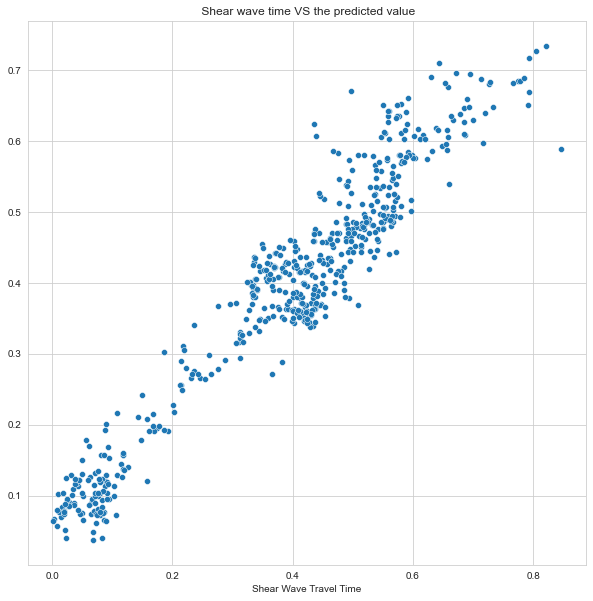

In [91]:
plt.figure(figsize=(10,10))
sns.scatterplot(y_test['Shear Wave Travel Time'],y_test_pred[:,1])
plt.title(" Shear wave time VS the predicted value")

c:\users\ae504\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, ' Compression wave time VS the predicted value')

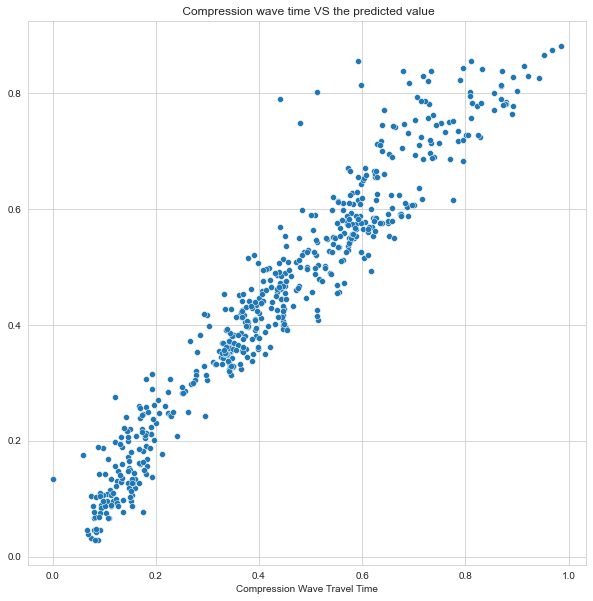

In [89]:
plt.figure(figsize=(10,10))
sns.scatterplot(y_test['Compression Wave Travel Time'],y_test_pred[:,0])
plt.title(" Compression wave time VS the predicted value")